Text(0.5, 0, 'Time(mins)')

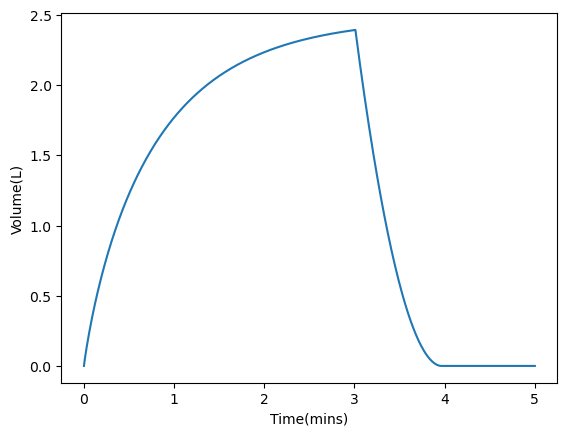

In [4]:

import numpy as np
from matplotlib import pyplot as plt

# Your solution here
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = 0.01                       # Time step (mins)
rate = 5                         # Filling rate (L/min)
bucket_capacity = 9              # L


all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

def leak_rate_fnc(volume):
    grav = 9.8*(60**2)    #mmin-2
    surface_area = 700/10000    #m2
    hole_area = 1/1e4    #m2
    height = ((volume/1000) / surface_area)
    water_speed = ((2*grav*height)**0.5)
    leak_rate = ((water_speed * hole_area)*1000)
    return leak_rate

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    if volume > 0:
        leak_volume = leak_rate_fnc(volume) * dt
        volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV   

    if volume < 0:
        volume = 0  

    time += dt             
    

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
#plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')